# 機械学習　第８章　実習問題（回帰）

## 問題文に従って各問題ごとにセルを複数追加してプログラムを実装してください。

## ※ 準備作業
### ▶ 以下を実施してください。

In [ ]:
# ドライブのマウント
# ディレクトリの作成
# ディレクトリへの移動
# house_rent.csv のアップロード

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
mkdir data

In [3]:
cd data

/content/data


## ※ matplotlib日本語化のためのライブラリのインストール
### ▶ 以下を実行してください。

In [4]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 10.6 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=e97e4e8ad619a167a85de4558aee040a1fd8ebbb37c60660a021e9daad421ea4
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


## データ分析対象データ

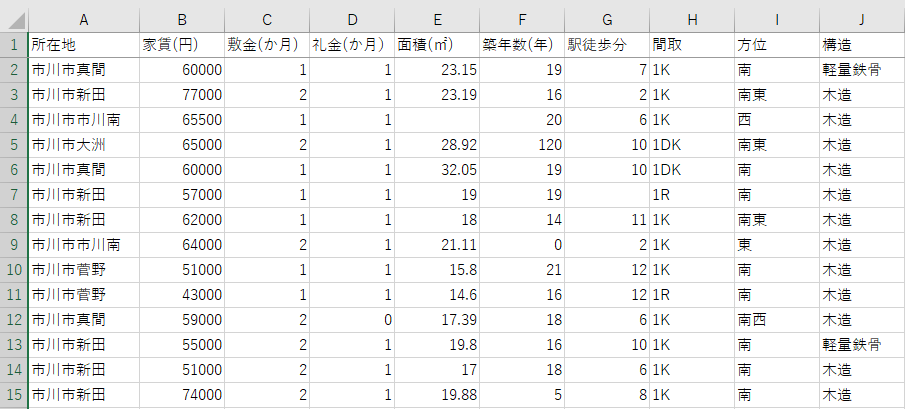

### ■ 正解データ　：　家賃（円）
### ■ 特徴量候補　：　所在地、敷金（か月）、礼金（か月）、面積（㎡）、築年数（年）、駅徒歩、間取、方位、構造

## 問題１　本データのデータ分析において使用する各種ライブラリをインポートしてください。
## また、グラフ表示が同一タブ上に表示されるようにしてください。

In [5]:
import pandas as pd
import japanize_matplotlib
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 問題２　CSVファイル house_rent.csv を読み込んでください。ただし、エンコーディングは cp932 を使用してください。

In [34]:
# ファイルの読み込み
df = pd.read_csv('house_rent.csv', encoding='cp932')

## 問題３　読み込んだCSVファイルの先頭５行と末尾５行を表示してください。

In [102]:
print('【先頭5行】')
df.head(5)

【先頭5行】


,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,1K,西,木造
3,市川市大洲,65000,2,1.0,28.92,120.0,10.0,1DK,南東,木造
4,市川市真間,60000,1,1.0,32.05,19.0,10.0,1DK,南,木造


In [103]:
print('【末尾5行】')
print(df.tail(5))

【末尾5行】
       所在地  家賃(円)  敷金(か月)  礼金(か月）  面積(㎡)  築年数(年)  駅徒歩分  間取  方位    構造
299  市川市新田  64000       2     1.0  22.01     NaN   5.0  1R   南    木造
300  市川市新田  52000       1     0.0  18.02    25.0  13.0  1K  南東  軽量鉄骨
301  市川市新田  57000       1     1.0  21.70    20.0  10.0  1K   南    木造
302  市川市真間  60000       1     1.0  20.37    13.0  14.0  1K   西   鉄骨造
303  市川市新田  72000       2     1.0  20.70     0.0   2.0  1K   東   鉄骨造


## 問題４　質的データの列をすべて挙げてください。つぎに、それらの列にデータが何種類あるかを調べて表示してください。

In [36]:
# 質的データの列
dummies_col = ['所在地', '間取', '方位', '構造']

print('・質的データの種類数')
for col_name in dummies_col:
  print(f'{df[col_name].value_counts()}')

・質的データの種類数
市川市新田     104
市川市市川南     74
市川市真間      42
市川市大洲      30
市川市市川      26
市川市菅野      20
市川市須和田      3
市川市平田       3
市川市大町       1
市川市大和田      1
Name: 所在地, dtype: int64
1K     229
1R      44
1DK     31
Name: 間取, dtype: int64
南     167
南東     48
東      30
西      26
南西     26
北東      4
北       3
Name: 方位, dtype: int64
木造      249
軽量鉄骨     44
鉄骨造      10
Name: 構造, dtype: int64


## 問題５　質的データをすべてダミー化してデータ分析させるデータフレームを作成して下さい。次に、作成したデータフレームの先頭５行を表示してください。

In [37]:
# ダミー化
df_dummies = pd.get_dummies(df[dummies_col], drop_first=True)
# ダミー化したデータを結合
df2 = pd.concat([df, df_dummies], axis=1)
# ダミー化を行った列の削除
df2 = df2.drop(dummies_col, axis=1)
# 先頭5つ表示
df2.head(5)

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1K,間取_1R,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_軽量鉄骨,構造_鉄骨造
0,60000,1,1.0,23.15,19.0,7.0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,77000,2,1.0,23.19,16.0,2.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,65500,1,1.0,NaN,20.0,6.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,65000,2,1.0,28.92,120.0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60000,1,1.0,32.05,19.0,10.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


## 問題６　問題５で作成したデータフレームにおいて、訓練データ、検証データ、テストデータに分割してください。
### ただし、訓練データとテストデータの比率は８：２、乱数シードは０とします。

In [196]:
train_val, test = train_test_split(df2, test_size=0.2, random_state=0)

## 問題７　訓練データにおいて、欠損値を確認して表示し、平均値で穴埋めしてください。欠損値処理した訓練データの先頭５行を表示してください。

In [197]:
print('【欠損値】')
print(train_val.isnull().sum())
# 欠損値を平均値で穴埋め
train_val_mean = train_val.mean()
train_val2 = train_val.fillna(train_val_mean)

【欠損値】
家賃(円)         0
敷金(か月)        0
礼金(か月）        0
面積(㎡)         1
築年数(年)        1
駅徒歩分          1
所在地_市川市大洲     0
所在地_市川市大町     0
所在地_市川市市川     0
所在地_市川市市川南    0
所在地_市川市平田     0
所在地_市川市新田     0
所在地_市川市真間     0
所在地_市川市菅野     0
所在地_市川市須和田    0
間取_1K         0
間取_1R         0
方位_北東         0
方位_南          0
方位_南東         0
方位_南西         0
方位_東          0
方位_西          0
構造_軽量鉄骨       0
構造_鉄骨造        0
dtype: int64


In [105]:
print('【欠損値穴埋め後】')
train_val2.head(5)

【欠損値穴埋め後】


,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,所在地_市川市市川南,所在地_市川市平田,所在地_市川市新田,所在地_市川市真間,所在地_市川市菅野,所在地_市川市須和田,間取_1K,間取_1R,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_軽量鉄骨,構造_鉄骨造
176,69000,2,1.0,19.87,1.0,2.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
26,70000,2,2.0,31.53,28.0,8.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
74,65000,2,1.0,28.92,12.0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
101,51000,1,1.0,20.50,20.0,2.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
154,72000,2,1.0,20.70,0.0,2.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


## 問題８　外れ値処理をしてください。
### ただし、処理過程を説明できるようにセルを構成してください。

In [220]:
"""外れ値を算出するための相関関数
colname = train_val2.columns
for name in colname:
  train_val2.plot(kind='scatter', x=name, y='家賃(円)')
"""
# 外れ値の選択
outline1 = train_val2[(train_val2['面積(㎡)'] > 50) & (train_val2['家賃(円)'] < 60000)].index
outline2 = train_val2[(train_val2['築年数(年)'] > 60) & (train_val2['家賃(円)'] < 70000)].index
outline3 = train_val2[(train_val2['敷金(か月)'] < 0.25) & (train_val2['家賃(円)'] < 70000)].index
outline4 = train_val2[(0.25 < train_val2['礼金(か月）']) & (train_val2['礼金(か月）'] < 0.75) & (train_val2['家賃(円)'] < 50000)].index
outline5 = train_val2[(train_val2['所在地_市川市大町'] > 0.2) & (train_val2['家賃(円)'] < 60000)].index
outline6 = train_val2[(train_val2['所在地_市川市平田'] > 0.2) & (train_val2['家賃(円)'] < 60000)].index
outline7 = train_val2[(train_val2['所在地_市川市須和田'] > 0.2) & (train_val2['家賃(円)'] < 80000)].index
outline8 = train_val2[(train_val2['方位_北東'] > 0.2) & (train_val2['家賃(円)'] < 70000)].index

# 外れ値を1つのリストにまとめる
outline = [outline1, outline2, outline3, outline4, outline5, outline6, outline7, outline8, ]
for val in outline:
  print(f'外れ値の値：{val}')

# 外れ値の削除
index_list = []           # 削除した値のリスト
train_val3 = train_val2   # train_val2の値を削除するため一旦退避
for val in outline:
  for index in val:
    # すでに削除している値は削除処理を行わないようにする
    if not (index in index_list):
      index_list.append(index)
      train_val3 = train_val3.drop([index], axis=0)

外れ値の値：Int64Index([95], dtype='int64')
外れ値の値：Int64Index([3], dtype='int64')
外れ値の値：Int64Index([122, 24, 275, 140, 57, 105], dtype='int64')
外れ値の値：Int64Index([14], dtype='int64')
外れ値の値：Int64Index([57], dtype='int64')
外れ値の値：Int64Index([192], dtype='int64')
外れ値の値：Int64Index([37, 151, 274], dtype='int64')
外れ値の値：Int64Index([253, 58, 98], dtype='int64')


## 問題９　外れ値処理の結果を表示してください。

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


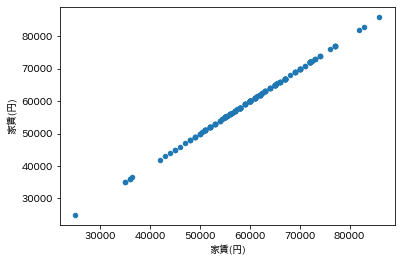

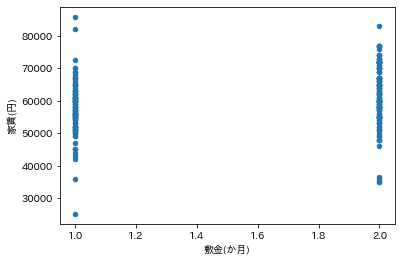

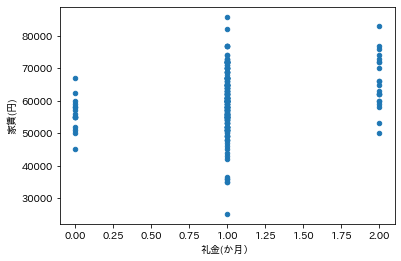

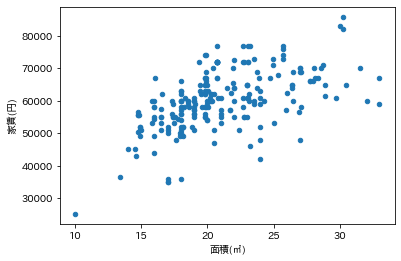

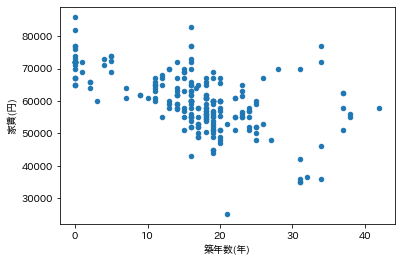

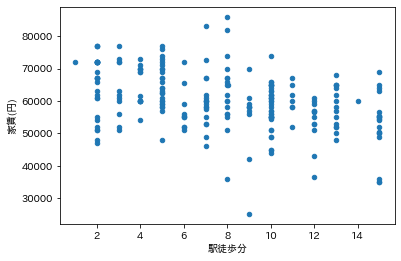

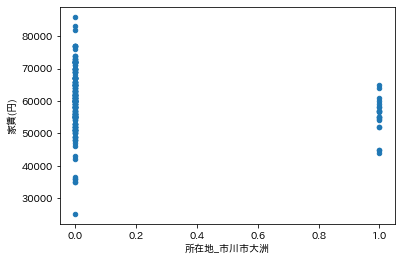

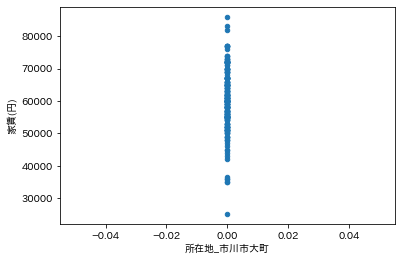

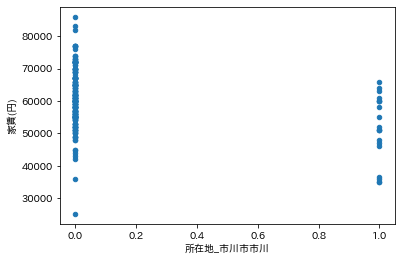

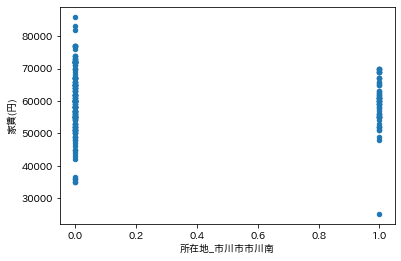

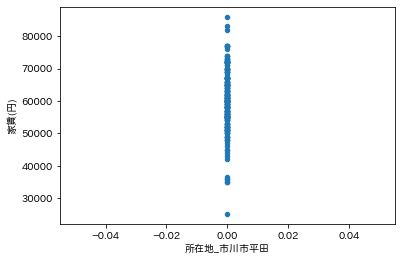

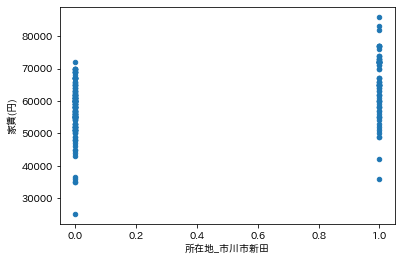

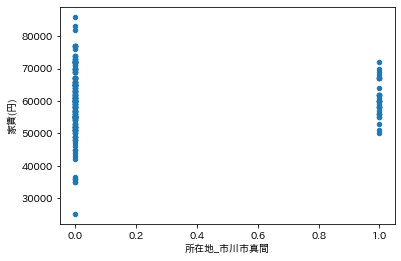

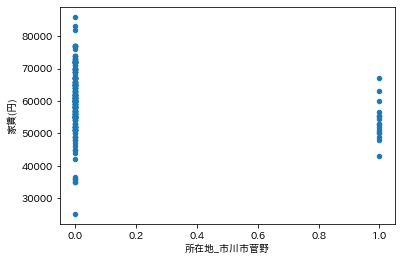

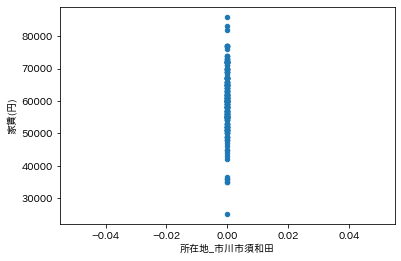

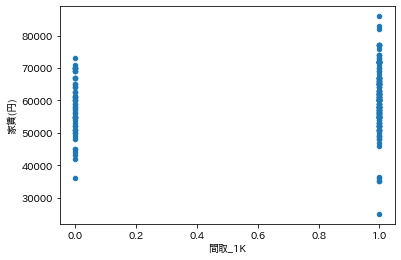

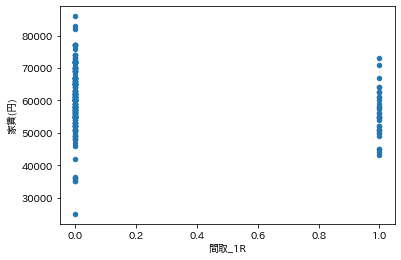

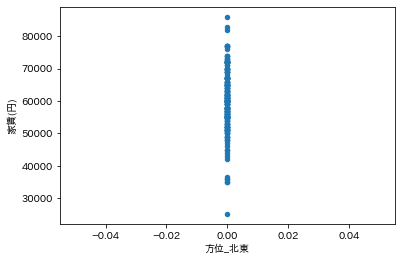

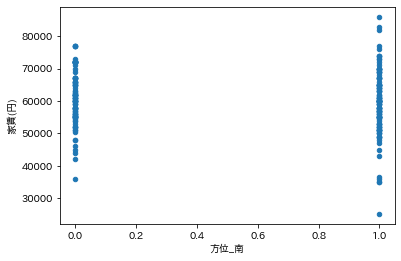

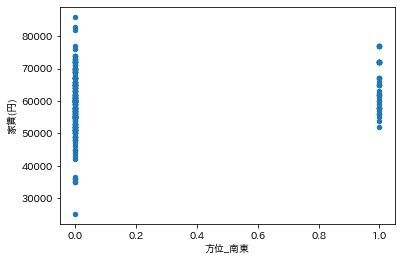

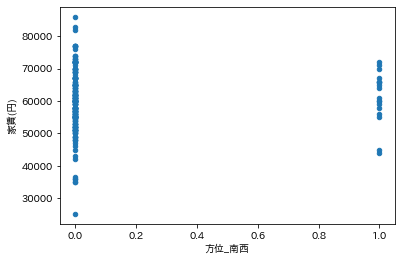

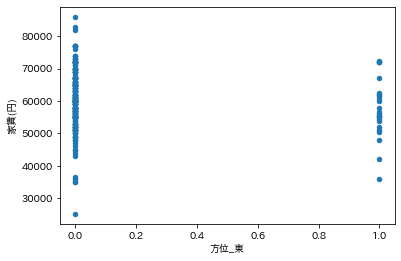

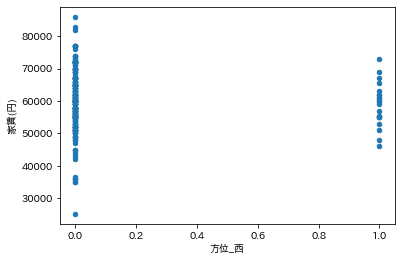

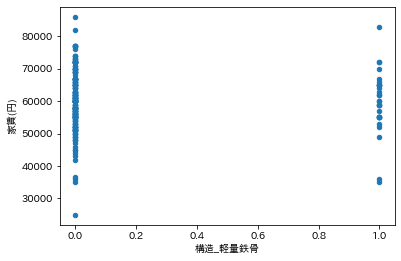

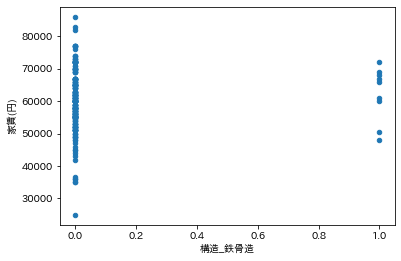

In [221]:
# 外れ値削除後の相関図
colname = train_val3.columns
for name in colname:
  train_val3.plot(kind='scatter', x=name, y='家賃(円)')

## 問題１０　正解データと各特徴量の相関関係を説明できるように表示してください。

In [222]:
# 家賃(円)列との相関係数
train_cor = train_val3.corr()['家賃(円)']
# 絶対値を計算
abs_cor = train_cor.map(abs)
# 要素の並び替え
abs_cor.sort_values(ascending=False)

家賃(円)         1.000000
築年数(年)        0.570510
面積(㎡)         0.551321
所在地_市川市新田     0.406815
駅徒歩分          0.399065
所在地_市川市市川     0.290340
敷金(か月)        0.238305
礼金(か月）        0.225361
方位_南東         0.223508
所在地_市川市菅野     0.194191
間取_1R         0.193845
所在地_市川市大洲     0.169177
間取_1K         0.126294
方位_東          0.091506
方位_南          0.086881
構造_鉄骨造        0.048797
方位_西          0.044707
所在地_市川市市川南    0.044301
方位_南西         0.038013
所在地_市川市真間     0.017704
構造_軽量鉄骨       0.016610
所在地_市川市大町          NaN
所在地_市川市平田          NaN
所在地_市川市須和田         NaN
方位_北東              NaN
Name: 家賃(円), dtype: float64

## 問題１１　正解データと特徴量を抽出し、それぞれの先頭５行を表示してください。

In [223]:
# 特徴量の選別
col = ['築年数(年)','面積(㎡)', '所在地_市川市新田', '駅徒歩分', '所在地_市川市市川', '敷金(か月)', '礼金(か月）', '所在地_市川市菅野', '方位_南東', ]
# 特徴量の抽出と出力
x = train_val3[col]
print('【特徴量】')
x.head(5)

【特徴量】


,築年数(年),面積(㎡),所在地_市川市新田,駅徒歩分,所在地_市川市市川,敷金(か月),礼金(か月）,所在地_市川市菅野,方位_南東
176,1.0,19.87,0,2.0,0,2,1.0,0,0
26,28.0,31.53,1,8.0,0,2,2.0,0,0
74,12.0,28.92,0,10.0,0,2,1.0,0,1
101,20.0,20.50,0,2.0,1,1,1.0,0,0
154,0.0,20.70,1,2.0,0,2,1.0,0,0


In [224]:
# 正解データの抽出
t = train_val3[['家賃(円)']]
print('【正解データ】')
t.head(5)

【正解データ】


,家賃(円)
176,69000
26,70000
74,65000
101,51000
154,72000


## 問題１２　問題１１で抽出した正解データと特徴量を使用して、訓練データと検証データに分割してください。
### ただし、訓練データと検証データの比率は８：２、乱数シードは０とします。

In [225]:
x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=0)

## 問題１３　線形重回帰モデルを使用して学習さて、検証データで決定係数を求めて表示してください。

In [226]:
from sklearn.preprocessing import StandardScaler
"""# 標準化を行った場合の決定係数(標準化しても値は一緒だったので、次の問題用にこのまま)
# 標準偏差の算出（特徴量）
sc_model_x = StandardScaler()
sc_model_x.fit(x_train)
sc_x = sc_model_x.transform(x_train)

# 標準偏差の算出（正解データ）
sc_model_y = StandardScaler()
sc_model_y.fit(y_train)
sc_y = sc_model_y.transform(y_train)

# 標準化したデータでの学習
model = LinearRegression()
model.fit(sc_x, sc_y)

# 検証データの標準化
sc_x_val = sc_model_x.transform(x_val)
sc_y_val = sc_model_y.transform(y_val)

# 決定係数の計算
print(model.score(sc_x_val, sc_y_val))
"""
# 標準化を行わない場合の決定係数
model = LinearRegression()
model.fit(x_train, y_train)
print(f'決定係数：{model.score(x_val, y_val)}')

決定係数：0.5699240866340527


## 問題１４　問題１３で学習したモデルを使用して以下のデータを使用して家賃がいくらになるか予測させてください。
### 予測させるデータは以下の通りです。
#### 敷金：１か月
#### 礼金；１か月
#### 面積：３０㎡
#### 築年数：３年
#### 駅徒歩分：１０分
#### 所在地：市川市新田
#### 間取：１DK
#### 方位：南向き
#### 構造：鉄骨造


In [227]:
import math
""" 特徴量の参考
# 特徴量の選別
col = ['築年数(年)','面積(㎡)', '所在地_市川市新田', '駅徒歩分', '所在地_市川市市川', '敷金(か月)', '礼金(か月）', '所在地_市川市菅野', '方位_南東', ]
"""
data =[[3.0, 30.0, 1.0, 10.0, 0.0, 1.0, 1.0, 0.0, 0.0, ]]
print(f'家賃（予測）：{math.floor(model.predict(data)[0])}円')

家賃（予測）：75339円


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


## 問題１５　特徴量エンジニアリングで訓練データと検証データの決定係数が特徴量エンジニアリングを行う前より良くなるようにしてください。
### ただし、特徴量エンジニアリングの過程が理解できるようにセルを構成してください。

In [231]:
"""xを変えるため問題11を再度実施する"""
# 特徴量の選別
col = ['築年数(年)','面積(㎡)', '所在地_市川市新田', '駅徒歩分', '所在地_市川市市川', '敷金(か月)', '礼金(か月）', '所在地_市川市菅野', '方位_南東', ]
# 特徴量の抽出と出力
x = train_val3[col]
print('【特徴量】')
x.head(5)

"""多項式特徴量"""
# 2乗の計算
x['築年数(年)2'] = x['築年数(年)'] ** 2
x['面積(㎡)2'] = x['面積(㎡)'] ** 2
x['駅徒歩分2'] = x['駅徒歩分'] ** 2
x['敷金(か月)2'] = x['敷金(か月)'] ** 2
x['礼金(か月）2'] = x['礼金(か月）'] ** 2

# 3乗の計算
x['築年数(年)3'] = x['築年数(年)'] ** 3
x['面積(㎡)3'] = x['面積(㎡)'] ** 3
x['駅徒歩分3'] = x['駅徒歩分'] ** 3
x['敷金(か月)3'] = x['敷金(か月)'] ** 3
x['礼金(か月）3'] = x['礼金(か月）'] ** 3

"""交互作用特徴量"""
x['築年数×面積'] = x['築年数(年)'] *  x['面積(㎡)']
x['築年数×駅徒歩'] = x['築年数(年)'] * x['駅徒歩分']
#x['面積×駅徒歩'] = x['面積(㎡)'] * x['駅徒歩分']         # 計算式に入れると決定係数が劇的に下がる
x

【特徴量】


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,築年数(年),面積(㎡),所在地_市川市新田,駅徒歩分,所在地_市川市市川,敷金(か月),礼金(か月）,所在地_市川市菅野,方位_南東,築年数(年)2,面積(㎡)2,駅徒歩分2,敷金(か月)2,礼金(か月）2,築年数(年)3,面積(㎡)3,駅徒歩分3,敷金(か月)3,礼金(か月）3,築年数×面積,築年数×駅徒歩
176,1.0,19.87,0,2.0,0,2,1.0,0,0,1.0,394.8169,4.0,4,1.0,1.0,7845.011803,8.0,8,1.0,19.87,2.0
26,28.0,31.53,1,8.0,0,2,2.0,0,0,784.0,994.1409,64.0,4,4.0,21952.0,31345.262577,512.0,8,8.0,882.84,224.0
74,12.0,28.92,0,10.0,0,2,1.0,0,1,144.0,836.3664,100.0,4,1.0,1728.0,24187.716288,1000.0,8,1.0,347.04,120.0
101,20.0,20.50,0,2.0,1,1,1.0,0,0,400.0,420.2500,4.0,1,1.0,8000.0,8615.125000,8.0,1,1.0,410.00,40.0
154,0.0,20.70,1,2.0,0,2,1.0,0,0,0.0,428.4900,4.0,4,1.0,0.0,8869.743000,8.0,8,1.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,38.0,21.06,0,6.0,0,1,1.0,0,0,1444.0,443.5236,36.0,1,1.0,54872.0,9340.607016,216.0,1,1.0,800.28,228.0
251,0.0,20.70,1,2.0,0,2,1.0,0,1,0.0,428.4900,4.0,4,1.0,0.0,8869.743000,8.0,8,1.0,0.00,0.0
117,14.0,24.75,0,11.0,0,1,1.0,1,0,196.0,612.5625,121.0,1,1.0,2744.0,15160.921875,1331.0,1,1.0,346.50,154.0
47,17.0,19.80,1,10.0,0,2,1.0,0,0,289.0,392.0400,100.0,4,1.0,4913.0,7762.392000,1000.0,8,1.0,336.60,170.0


## 問題１６　チューニング結果を受けて、データの標準化後再学習をしてください。

In [232]:
# learn関数にて標準化と決定係数を算出できるようにする
def learn(x, t):
  x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=0)

  sc_model_x = StandardScaler()
  sc_model_y = StandardScaler()

  # 訓練データにおける特徴量の標準化
  sc_model_x.fit(x_train)
  sc_x_train = sc_model_x.transform(x_train)

  # 訓練データにおける正解データの標準化
  sc_model_y.fit(y_train)
  sc_y_train = sc_model_y.transform(y_train)

  # 学習
  model = LinearRegression()
  model.fit(sc_x_train, sc_y_train)

  # 検証データにおける特徴量の標準化
  sc_x_val = sc_model_x.transform(x_val)

  # 検証データにおける正解データの標準化
  sc_y_val = sc_model_y.transform(y_val)

  # 訓練データと検証データの決定係数の計算
  train_score = model.score(sc_x_train, sc_y_train)
  val_score = model.score(sc_x_val, sc_y_val)

  return train_score, val_score

In [233]:
s1, s2 = learn(x, t)

print(f'訓練データにおける決定係数:{s1}')
print(f'検証データにおける決定係数:{s2}')

訓練データにおける決定係数:0.7535883391426696
検証データにおける決定係数:0.6111182648689228


## 問題１７　テストデータを使用してモデルを評価してください。
## ただし、決定係数の値が 0.65 以上となるようにしてください。

In [235]:
"""再学習"""
# 訓練・検証データにおける特徴量の標準化
sc_model_x2 = StandardScaler()
sc_model_x2.fit(x)
sc_x = sc_model_x2.transform(x)

# 訓練・検証データにおける正解データの標準化
sc_model_y2 = StandardScaler()
sc_model_y2.fit(t)
sc_y = sc_model_y2.transform(t)

# 学習
model = LinearRegression()
model.fit(sc_x, sc_y)

"""テストデータの加工"""
# 欠損値の穴埋め処理
test2 = test.fillna(train_val.mean())

# 特徴量の抜き出し
x_test = test2.loc[:, col]

# 正解データの抜き出し
y_test = test2[['家賃(円)']]

"""多項式特徴量"""
# 2乗の計算
x_test['築年数(年)2'] = x_test['築年数(年)'] ** 2
x_test['面積(㎡)2'] = x_test['面積(㎡)'] ** 2
x_test['駅徒歩分2'] = x_test['駅徒歩分'] ** 2
x_test['敷金(か月)2'] = x_test['敷金(か月)'] ** 2
x_test['礼金(か月）2'] = x_test['礼金(か月）'] ** 2

# 3乗の計算
x_test['築年数(年)3'] = x_test['築年数(年)'] ** 3
x_test['面積(㎡)3'] = x_test['面積(㎡)'] ** 3
x_test['駅徒歩分3'] = x_test['駅徒歩分'] ** 3
x_test['敷金(か月)3'] = x_test['敷金(か月)'] ** 3
x_test['礼金(か月）3'] = x_test['礼金(か月）'] ** 3

"""交互作用特徴量"""
x_test['築年数×面積'] = x_test['築年数(年)'] *  x_test['面積(㎡)']
x_test['築年数×駅徒歩'] = x_test['築年数(年)'] * x_test['駅徒歩分']
x_test


,築年数(年),面積(㎡),所在地_市川市新田,駅徒歩分,所在地_市川市市川,敷金(か月),礼金(か月）,所在地_市川市菅野,方位_南東,築年数(年)2,面積(㎡)2,駅徒歩分2,敷金(か月)2,礼金(か月）2,築年数(年)3,面積(㎡)3,駅徒歩分3,敷金(か月)3,礼金(か月）3,築年数×面積,築年数×駅徒歩
66,4.0,18.04,0,8.0,0,2,1.0,0,0,16.0,325.4416,64.0,4,1.0,64.0,5870.966464,512.0,8,1.0,72.16,32.0
156,16.0,20.00,0,4.0,1,2,1.0,0,0,256.0,400.0000,16.0,4,1.0,4096.0,8000.000000,64.0,8,1.0,320.00,64.0
247,19.0,18.00,0,10.0,0,1,1.0,0,0,361.0,324.0000,100.0,1,1.0,6859.0,5832.000000,1000.0,1,1.0,342.00,190.0
267,14.0,20.03,0,15.0,0,2,1.0,1,0,196.0,401.2009,225.0,4,1.0,2744.0,8036.054027,3375.0,8,1.0,280.42,210.0
145,22.0,20.66,0,8.0,1,1,2.0,0,0,484.0,426.8356,64.0,1,4.0,10648.0,8818.423496,512.0,1,8.0,454.52,176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,16.0,20.24,0,13.0,1,2,1.0,0,0,256.0,409.6576,169.0,4,1.0,4096.0,8291.469824,2197.0,8,1.0,323.84,208.0
116,28.0,26.00,1,10.0,0,2,1.0,0,0,784.0,676.0000,100.0,4,1.0,21952.0,17576.000000,1000.0,8,1.0,728.00,280.0
188,11.0,25.40,0,10.0,0,1,1.0,0,0,121.0,645.1600,100.0,1,1.0,1331.0,16387.064000,1000.0,1,1.0,279.40,110.0
64,21.0,21.00,0,10.0,0,1,1.0,0,0,441.0,441.0000,100.0,1,1.0,9261.0,9261.000000,1000.0,1,1.0,441.00,210.0


In [236]:
sc_x_test = sc_model_x2.transform(x_test)
sc_y_test = sc_model_y2.transform(y_test)

print(f'テストデータにおける決定係数：{model.score(sc_x_test, sc_y_test)}')

テストデータにおける決定係数：0.6954282401367682


## 問題１８　モデルとStandardScalerオブジェクトを保存してください。
### ただし、モデルは house_rent.pkl、StandardScalerオブジェクトは house_rent_scx と house_rent_scy とします。

In [237]:
import pickle

# 標準化前のモデルの保存
with open('house_rent.pkl', 'wb') as f:
  pickle.dump(model, f)

# StandardScale(x2)の保存
with open('hose_rent_scx', 'wb') as f:
  pickle.dump(sc_model_x2, f)

# StandardScale(y2)の保存
with open('hose_rent_scy', 'wb') as f:
  pickle.dump(sc_model_y2, f)